In [1]:
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
MODEL_NAMES = ['No Constraint', 'NDT Constraint']
PARAM_NAMES = [r'Threshold ($\theta$)', r'Decay ($\lambda$)']
PLOT_TITLES = ['Exponential', 'Hyperbolic']
COLOR_BAR = sns.diverging_palette(10, 150, as_cmap=True, center='light')

FONT_SIZE_1 = 15
FONT_SIZE_2 = 14
FONT_SIZE_3 = 11

In [3]:
import matplotlib
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

In [4]:
def plot_recovery_heatmap(data_list, param_names, model_names, x_label, color_bar_pos, wspace, plot_name):
    fig, axes = plt.subplots(1, 2, figsize=(8, 3), gridspec_kw={'width_ratios': [1, 1], 'wspace': wspace})
    for i, ax in enumerate(axes):
        sns.heatmap(
            data_list[i], annot=True, fmt='.2f', annot_kws={"size": FONT_SIZE_3},
            yticklabels=param_names if i == 0 else [],
            xticklabels=model_names, cmap=COLOR_BAR, ax=ax, vmin=0, vmax=1,
            cbar=False, square=True
        )
        ax.set_title(PLOT_TITLES[i], fontsize=FONT_SIZE_1, pad=10)
        if i == 0:
            ax.set_ylabel('Parameter', fontsize=FONT_SIZE_2)
        else:
            ax.set_ylabel('')
        ax.set_xlabel(x_label, fontsize=FONT_SIZE_2)
        ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_3)
    # Add a single color bar for the entire figure
    cbar_ax = fig.add_axes(color_bar_pos)  # [left, bottom, width, height]
    norm = plt.Normalize(vmin=0, vmax=1)
    sm = plt.cm.ScalarMappable(cmap=COLOR_BAR, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cbar_ax, orientation='vertical')
    # Remove the outline of the color bar
    cbar.outline.set_visible(False)
    # Adjust the font size of the numbers on the color bar
    cbar.ax.tick_params(labelsize=FONT_SIZE_3)

    plt.savefig(
        f'plots/{plot_name}.pdf',
        transparent=True, dpi=600,
        bbox_inches='tight'
    )

## Parameter Recovery 

In [5]:
param_names = [r'Threshold ($\theta$)', r'Decay ($\lambda$)']
model_names = ['No Constraint', 'NDT Constraint']
x_label = 'Model'
color_bar_pos = [0.84, 0.1, 0.02, 0.78]
wspace = -0.3

### IE

### BF

In [6]:
with open('_02_BF/data/BF_recovery_r2_scores.pkl', 'rb') as f:
    r2_scores_dict = pickle.load(f)

In [7]:
data_hyperbolic = np.array([
    [values[1], values[2]] for key, values in r2_scores_dict.items() if 'hyperbolic' in key
])
data_exponential = np.array([
    [values[1], values[2]] for key, values in r2_scores_dict.items() if 'exponential' in key
])
data_hyperbolic = data_hyperbolic.T
data_exponential = data_exponential.T
data_list = [data_exponential, data_hyperbolic]

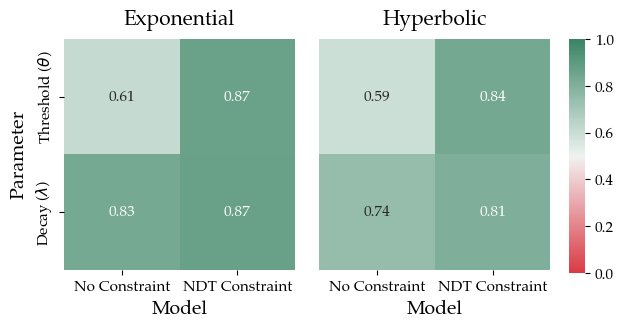

In [8]:
plot_recovery_heatmap(
    data_list, param_names, model_names, x_label, color_bar_pos, wspace, 'BF_parameter_recovery.pdf'
)

## Sensitivity to Noise

In [9]:
param_names = [
    r'Threshold ($\theta$)', r'Decay ($\lambda$)',
    r'NDT ($\tau$)', r'Drift rate ($v$)'
]
model_names = [
    'No constraint', r'$\sigma_z = 0.3$', 
    r'$\sigma_z = 0.6$', r'$\sigma_z = 0.9$',
    'Noise only'
]
x_label = 'Model'
color_bar_pos = [0.9, 0.11, 0.02, 0.77]
wspace = 0.0

### IE

### BF

In [10]:
with open('_02_BF/data/BF_noise_sensitivity_r2_scores.pkl', 'rb') as f:
    r2_scores_dict = pickle.load(f)

In [11]:
data_hyperbolic = np.array([
    [values[1], values[2], values[3], values[0]] for key, values in r2_scores_dict.items() if 'hyperbolic' in key
])
data_exponential = np.array([
    [values[1], values[2], values[3], values[0]] for key, values in r2_scores_dict.items() if 'exponential' in key
])
data_hyperbolic = data_hyperbolic.T
data_exponential = data_exponential.T
data_list = [data_exponential, data_hyperbolic]

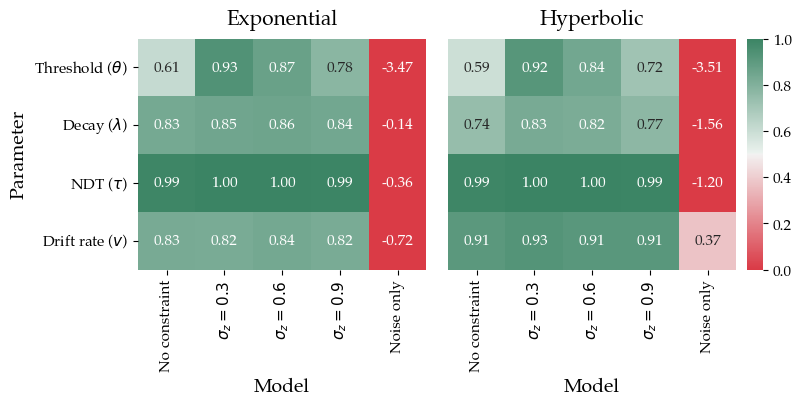

In [12]:
plot_recovery_heatmap(
    data_list, param_names, model_names, x_label, color_bar_pos, wspace, 'BF_noise_sensitivity'
)

## Sensitivity to Number of Observations

In [13]:
param_names = [
    r'Threshold ($\theta$)', r'Decay ($\lambda$)',
    r'NDT ($\tau$)', r'Drift rate ($v$)'
]
model_names = [
    r'$N = 100$', r'$N = 250$', r'$N = 500$', r'$N = 1000$'
]
x_label = 'Number of observations'
color_bar_pos = [0.9, 0.11, 0.02, 0.77]
wspace = 0.0

### IF

### BF

In [14]:
with open('_02_BF/data/BF_num_obs_sensitivity_r2_scores.pkl', 'rb') as f:
    r2_scores_dict = pickle.load(f)

In [15]:
data_hyperbolic = np.array([
    [values[1], values[2], values[3], values[0]] for key, values in r2_scores_dict.items() if 'hyperbolic' in key
])
data_exponential = np.array([
    [values[1], values[2], values[3], values[0]] for key, values in r2_scores_dict.items() if 'exponential' in key
])
data_hyperbolic = data_hyperbolic.T
data_exponential = data_exponential.T
data_list = [data_exponential, data_hyperbolic]

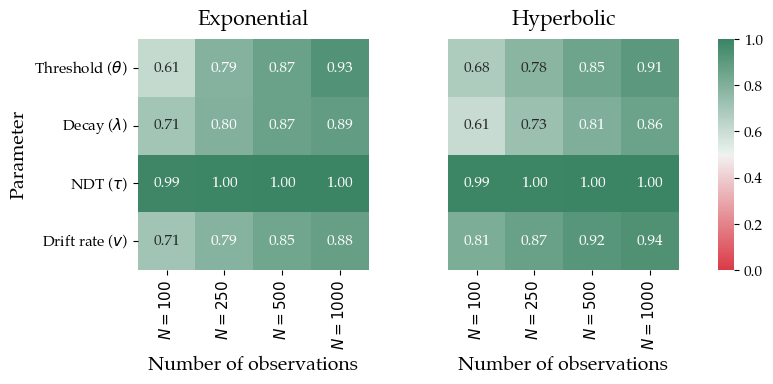

In [16]:
plot_recovery_heatmap(
    data_list, param_names, model_names, x_label, color_bar_pos, wspace, 'BF_num_obs_sensitivity'
)